# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
import itertools 
import pandas as pd
import numpy as np
import requests
import gmaps
import random
import time
import os

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [4]:
# Generate 5000 random Latitude and Longitude coordinates 

lat_list = []
lon_list = []

for i in range(0,5000):
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    lat_list.append(int(lat))
    lon_list.append(int(lon))

In [5]:
# Use citipy to match the lat, lon coordinates to a nearby city. Append results to empty list

city_list = []

for x,i in zip(lat_list,lon_list):
    try:
        city = citipy.nearest_city(lat_list[x],lon_list[i])
        city_name = city.city_name
        city_list.append(city_name)
    except:
        print("No City Found")

print(city_list)

['mahebourg', 'ngerengere', 'albany', 'ushuaia', 'kennewick', 'lokosovo', 'laguna', 'ushuaia', 'beberibe', 'albany', 'sulangan', 'tasiilaq', 'muros', 'thompson', 'taolanaro', 'mataura', 'hermanus', 'rikitea', 'lebu', 'boquira', 'kazalinsk', 'moron', 'mataura', 'hilo', 'dikson', 'narsaq', 'anzhero-sudzhensk', 'tasiilaq', 'faanui', 'arman', 'liku', 'rikitea', 'hobart', 'punta arenas', 'ushuaia', 'mahebourg', 'faanui', 'port alfred', 'kahului', 'ushuaia', 'bluff', 'panguna', 'ushuaia', 'gushikawa', 'tsihombe', 'busselton', 'goderich', 'saint-philippe', 'chokurdakh', 'akdepe', 'bengkulu', 'bocaranga', 'sentyabrskiy', 'avarua', 'rio gallegos', 'punta arenas', 'zhigansk', 'castro', 'williamsport', 'pevek', 'banjar', 'tual', 'roald', 'challans', 'whitehorse', 'ushuaia', 'sola', 'braco do norte', 'kwinana', 'punta arenas', 'hithadhoo', 'taolanaro', 'victoria', 'taolanaro', 'korla', 'ushuaia', 'comodoro rivadavia', 'cooma', 'lebu', 'lebu', 'ilulissat', 'punta arenas', 'carutapera', 'east london

In [6]:
# Return list count value
len(city_list)

5000

In [7]:
# Remove duplicate Cities prior to API call for efficiency purposes
temp_list = []

for i in city_list:
    if i not in temp_list:
        temp_list.append(i)

clean_city_list = temp_list

# Return clean list count value and make sure it is over 500
len(clean_city_list)

1450

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Build query URL

units = "imperial"
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [9]:
# ***NOTE*** API processing takes aobut 6 minutes to complete
# Create empty lists for API call data to append to
city_final_list = []
temp_list = []
lat_list = []
lon_list = []
temp_max_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []

# Print out that processing is beginning
print("Begin Data Processing")
print("---------------------")

# Loop through the city list without duplicates and pull necessary fields from API, append data to lists above

for city in clean_city_list:
    try:
        response = requests.get(base_url + city).json()
        print(f"Processing data for City Name: {city}, City ID: {response['sys']['id']}")
        city_final_list.append(city)
        temp_list.append(response['main']['temp'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        temp_max_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloud_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
    except:
        print("Error: City Information Not Found")

# Print out processing is completed
print("---------------------------")
print("Data Processing is Complete")

Begin Data Processing
---------------------
Processing data for City Name: mahebourg, City ID: 2061
Processing data for City Name: ngerengere, City ID: 2615
Processing data for City Name: albany, City ID: 19530
Processing data for City Name: ushuaia, City ID: 8303
Processing data for City Name: kennewick, City ID: 5409
Error: City Information Not Found
Processing data for City Name: laguna, City ID: 5769
Processing data for City Name: beberibe, City ID: 8363
Error: City Information Not Found
Processing data for City Name: tasiilaq, City ID: 81
Processing data for City Name: muros, City ID: 2000018
Processing data for City Name: thompson, City ID: 935
Error: City Information Not Found
Processing data for City Name: mataura, City ID: 2008959
Processing data for City Name: hermanus, City ID: 2003650
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: moron, City ID: 2008838
P

Error: City Information Not Found
Processing data for City Name: oga, City ID: 6945
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: bredasdorp, City ID: 1966
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: saint-medard-en-jalles, City ID: 6450
Processing data for City Name: westport, City ID: 3409
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: telfs, City ID: 6872
Processing data for City Name: cape town, City ID: 1899
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: ilovlya, City ID: 8973
Processing data for City Name: touros, City ID: 8452
Processing

Processing data for City Name: kushiro, City ID: 7977
Processing data for City Name: kirkwall, City ID: 1437
Error: City Information Not Found
Processing data for City Name: lalpur, City ID: 9070
Error: City Information Not Found
Processing data for City Name: kemi, City ID: 1341
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: macapa, City ID: 8415
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: christchurch, City ID: 7348
Processing data for City Name: amasya, City ID: 6960
Processing data for City Name: lasa, City ID: 6813
Error: City Information Not Found
Processing data for City Name: tortoli, City ID: 6733
Processing data for City Name: southampton, City ID: 2012639
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing dat

Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: santa marinella, City ID: 6795
Processing data for City Name: namtsy, City ID: 8854
Processing data for City Name: slave lake, City ID: 1008
Processing data for City Name: msanga, City ID: 2608
Processing data for City Name: santa cruz de tenerife, City ID: 2374
Error: City Information Not Found
Processing data for City Name: patrocinio, City ID: 8311
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: nome, City ID: 7770
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: yanam, City ID: 9225
Processing data for City Name: oktyabrskoye, City ID: 8969
Processing data for City Name: istok, City ID

Processing data for City Name: lata, City ID: 2001739
Processing data for City Name: pampa, City ID: 5389
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: hay river, City ID: 1036
Error: City Information Not Found
Processing data for City Name: santo tomas, City ID: 8160
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: loutros, City ID: 19283
Processing data for City Name: cedar city, City ID: 3584
Processing data for City Name: massa marittima, City ID: 2000264
Processing data for City Name: virginia beach, City ID: 2003143
Processing data for City Name: regen, City ID: 2033539
Error: City Information Not Found
Processing data for City Name: opole lubelskie, City ID: 197808
Processing data for City Name: shasta lake, City ID: 5632
Processing data for City Name: storforshei, City ID: 1651
Processing data for City Name: h

Error: City Information Not Found
Processing data for City Name: veinticinco de mayo, City ID: 2019609
Processing data for City Name: lamtah, City ID: 1193
Error: City Information Not Found
Processing data for City Name: hurricane, City ID: 5832
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: saint anthony, City ID: 4900
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: estelle, City ID: 5052
Processing data for City Name: accra, City ID: 1126
Processing data for City Name: sai buri, City ID: 9271
Processing data for City Name: krasnoye, City ID: 8909
Processing data for City Name: klaksvik, City ID: 1596
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: matamoros, City ID: 7155
Error: City Information Not Found
Processing data for City Na

Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: tsuyama, City ID: 8018
Processing data for City Name: changchun, City ID: 9675
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: iquique, City ID: 8492
Processing data for City Name: shelburne, City ID: 18684
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: zaragoza, City ID: 6439
Processing data for City Name: heihe, City ID: 8859
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: blind river, City ID: 1006
Error: City Information Not Found
Processing data for City Name: ballitoville, City ID: 1934
Error: City Information Not Found
Processing data for City Name: cumbernauld, C

Processing data for City Name: dangriga, City ID: 2033108
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: sharjah, City ID: 7545
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: kalaisan, City ID: 8154
Processing data for City Name: baghdad, City ID: 7597
Error: City Information Not Found
Processing data for City Name: daia, City ID: 2038143
Error: City Information Not Found
Processing data for City Name: bairiki, City ID: 7300
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: beira, City ID: 2194
Processing data for City Name: berkak, City ID: 131520
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: caraquet, City ID: 404


In [10]:
# print out the lists to see data
print(city_final_list)
print(temp_list)
print(lat_list)
print(lon_list)
print(temp_max_list)
print(humidity_list)
print(cloud_list)
print(wind_list)
print(country_list)
print(date_list)

['mahebourg', 'ngerengere', 'albany', 'ushuaia', 'kennewick', 'laguna', 'beberibe', 'tasiilaq', 'muros', 'thompson', 'mataura', 'hermanus', 'moron', 'hilo', 'narsaq', 'anzhero-sudzhensk', 'hobart', 'punta arenas', 'kahului', 'bluff', 'gushikawa', 'busselton', 'goderich', 'saint-philippe', 'akdepe', 'avarua', 'rio gallegos', 'williamsport', 'banjar', 'roald', 'challans', 'whitehorse', 'sola', 'kwinana', 'victoria', 'comodoro rivadavia', 'cooma', 'ilulissat', 'east london', 'dubbo', 'kodiak', 'pisco', 'bethel', 'port pirie', 'san benito', 'padang', 'itoman', 'agropoli', 'saldanha', 'port-cartier', 'kapaa', 'makakilo city', 'flinders', 'nouadhibou', 'jamestown', 'norman wells', 'fort nelson', 'katsuura', 'turayf', 'mar del plata', 'port elizabeth', 'cabo san lucas', 'san fernando', 'vila velha', 'kiama', 'gavle', 'blagoveshchensk', 'russell', 'barrow', 'coquimbo', 'los llanos de aridane', 'terrak', 'new norfolk', 'esperance', 'karlskrona', 'fairbanks', 'almeria', 'sitka', 'georgetown', 'k

In [11]:
# Check to make sure data for at least 500 cities were appended
len(city_final_list)

655

In [12]:
# Starter Code Example

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictionary of all the pulled data
dict = {'City Name': city_final_list, 
        'Current Temp': temp_list, 
        'Latitude': lat_list,
        'Longitude': lon_list,
        'Max Temp': temp_max_list,
        'Humidity': humidity_list,
        'Cloudiness': cloud_list,
        'Wind': wind_list,
        'Country': country_list,
        'Date': date_list      
       }  
# Create dataframe from dictionary
city_weather_df = pd.DataFrame(dict) 

# Create CSV of Data frame
city_weather_df.to_csv('../Resources/city_weather_data.csv') 

In [14]:
# Display dataframe
city_weather_df

,City Name,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,mahebourg,73.40,-20.4081,57.7000,73.40,94,40,6.91,MU,1620014014
1,ngerengere,71.60,-6.7500,38.1167,71.60,100,75,2.86,TZ,1620014147
2,albany,51.12,42.6001,-73.9662,54.00,66,99,3.27,US,1620013972
3,ushuaia,33.80,-54.8000,-68.3000,33.80,75,75,18.41,AR,1620013888
4,kennewick,63.48,46.2113,-119.1372,66.20,24,1,11.50,US,1620013956
...,...,...,...,...,...,...,...,...,...,...
650,svetlyy,41.00,54.6750,20.1347,41.00,87,75,17.90,RU,1620014618
651,berlevag,22.95,70.8578,29.0864,24.80,86,20,1.14,NO,1620014620
652,blenheim,61.07,-41.5160,173.9528,62.01,49,2,1.01,NZ,1620014412
653,orangeville,50.65,43.9168,-80.0997,52.00,96,100,10.74,CA,1620014397


In [15]:
city_weather_df.describe()

,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Date
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,6.550000e+02
mean,60.358718,23.401482,-5.770235,61.324550,70.630534,42.810687,7.941282,1.620014e+09
std,16.842733,31.236573,87.464518,16.772276,20.891909,37.002242,5.537296,1.605264e+02
min,17.260000,-54.800000,-175.200000,17.600000,11.000000,0.000000,0.760000,1.620014e+09
25%,47.010000,3.349900,-77.037650,48.200000,59.000000,1.000000,4.000000,1.620014e+09
50%,61.480000,34.883300,-3.296000,62.600000,75.000000,40.000000,6.910000,1.620014e+09
75%,73.890000,45.933400,52.614400,75.200000,87.000000,75.000000,10.540000,1.620014e+09
max,93.200000,78.218600,177.483300,96.010000,100.000000,100.000000,48.340000,1.620015e+09


In [16]:
# starter code example

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# Check to see if there are any cities with humidity > 100
humidity_over_100_list = city_weather_df.loc[city_weather_df["Humidity"] > 100, :]
humidity_over_100_list.count()

City Name       0
Current Temp    0
Latitude        0
Longitude       0
Max Temp        0
Humidity        0
Cloudiness      0
Wind            0
Country         0
Date            0
dtype: int64

In [18]:
# No Cities found with humidity > 100, skip following steps

In [19]:
# Come back and do section above at end
clean_city_data = city_weather_df
clean_city_data

,City Name,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,mahebourg,73.40,-20.4081,57.7000,73.40,94,40,6.91,MU,1620014014
1,ngerengere,71.60,-6.7500,38.1167,71.60,100,75,2.86,TZ,1620014147
2,albany,51.12,42.6001,-73.9662,54.00,66,99,3.27,US,1620013972
3,ushuaia,33.80,-54.8000,-68.3000,33.80,75,75,18.41,AR,1620013888
4,kennewick,63.48,46.2113,-119.1372,66.20,24,1,11.50,US,1620013956
...,...,...,...,...,...,...,...,...,...,...
650,svetlyy,41.00,54.6750,20.1347,41.00,87,75,17.90,RU,1620014618
651,berlevag,22.95,70.8578,29.0864,24.80,86,20,1.14,NO,1620014620
652,blenheim,61.07,-41.5160,173.9528,62.01,49,2,1.01,NZ,1620014412
653,orangeville,50.65,43.9168,-80.0997,52.00,96,100,10.74,CA,1620014397


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

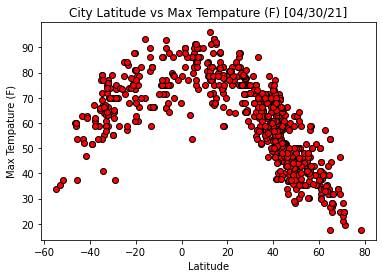

In [20]:
# Generate scatter of Latitude vs. Max Temp 
city_max_temp_list = clean_city_data['Max Temp'].tolist()
city_lat_list = clean_city_data['Latitude'].tolist()

plt.scatter(city_lat_list, city_max_temp_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Tempature (F) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")

plt.savefig('../Image Output/lat_vs_max_temp.jpg')

Analysis: Tempatures are highest near the Equator. Further, colder tempatures are seeen in the northern hempisphere.

In [21]:
# Starter Code Example

## Latitude vs. Humidity Plot

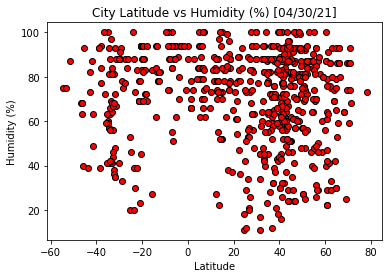

In [22]:
# Generate scatter plot of Lat vs. Humidity
city_humidity_list = clean_city_data['Humidity'].tolist()

plt.scatter(city_lat_list, city_humidity_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity (%) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('../Image Output/lat_vs_humidity.jpg')

Analysis: Humidity levels range across the board in both hemispheres. When looking at the chart above, one can note that at the equator, the humidity levels are generally higher.

In [23]:
#Starter Code Example

## Latitude vs. Cloudiness Plot

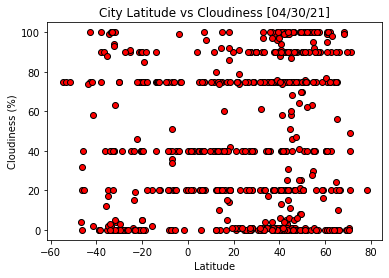

In [24]:
# Scatter plot of Latitude vs. Cloudiness
city_cloud_list = clean_city_data['Cloudiness'].tolist()

plt.scatter(city_lat_list, city_cloud_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../Image Output/lat_vs_cloudiness.jpg')

In [25]:
#Starter Code Example

## Latitude vs. Wind Speed Plot

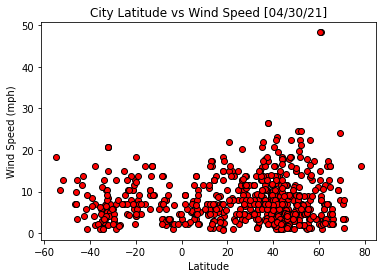

In [26]:
# Scatter plot of Lat vs. Wind Speed
city_wind_list = clean_city_data['Wind'].tolist()

plt.scatter(city_lat_list, city_wind_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../Image Output/lat_vs_wind_speed.jpg')

Analysis: Across both Northern and Southern Hempispheres, wind speed was most often between 0-20 mpg. There were some higher wind speed outliers found in the northern hemisphere.

In [27]:
# Starter Code Example

## Linear Regression

In [28]:
# Create new dataframes for North and South Hemispheres
north_hem_df = city_weather_df.loc[city_weather_df["Latitude"] >= 0, :]
south_hem_df = city_weather_df.loc[city_weather_df["Latitude"] < 0, :]

In [29]:
# Create lists of the lat cooridnates
north_hem_lat_list = north_hem_df['Latitude'].tolist()
south_hem_lat_list = south_hem_df['Latitude'].tolist()

In [30]:
# create Max Temp Lists and convert to int
north_hem_max_temp_list = north_hem_df['Max Temp'].tolist()
north_hem_max_temp_int_list = []
south_hem_max_temp_list = south_hem_df['Max Temp'].tolist()
south_hem_max_temp_int_list = []

for value in north_hem_max_temp_list:
    try:
        north_hem_max_temp_int_list.append(int(value))
    except ValueError:
        continue
print(north_hem_max_temp_int_list)

[54, 66, 78, 28, 45, 30, 78, 41, 57, 80, 75, 57, 66, 66, 39, 39, 50, 77, 46, 42, 62, 57, 75, 53, 36, 75, 80, 64, 62, 44, 51, 69, 62, 77, 91, 35, 62, 75, 19, 64, 32, 41, 53, 62, 50, 87, 45, 42, 35, 28, 78, 66, 55, 32, 52, 37, 39, 59, 41, 62, 55, 62, 51, 66, 53, 53, 50, 46, 57, 69, 28, 71, 24, 66, 78, 36, 68, 37, 68, 71, 71, 46, 86, 46, 89, 78, 44, 68, 75, 50, 60, 84, 77, 53, 39, 33, 93, 44, 60, 60, 60, 51, 66, 35, 43, 78, 64, 46, 60, 51, 35, 59, 42, 68, 50, 50, 35, 82, 26, 78, 55, 37, 59, 46, 46, 30, 53, 37, 57, 66, 37, 91, 68, 39, 71, 55, 46, 37, 21, 73, 75, 37, 78, 72, 42, 53, 48, 57, 84, 80, 62, 86, 46, 30, 80, 69, 37, 59, 53, 59, 32, 70, 86, 84, 41, 60, 69, 53, 57, 17, 51, 42, 51, 80, 35, 53, 75, 62, 82, 75, 48, 82, 48, 53, 57, 41, 64, 39, 87, 55, 52, 45, 75, 53, 60, 50, 75, 35, 44, 37, 42, 53, 86, 68, 82, 24, 68, 69, 33, 55, 53, 32, 33, 68, 48, 44, 93, 77, 46, 41, 71, 53, 32, 59, 75, 91, 64, 77, 55, 43, 89, 77, 42, 17, 78, 82, 64, 48, 79, 39, 64, 78, 57, 53, 69, 30, 93, 66, 46, 53,

In [31]:
south_hem_max_temp_list = south_hem_df['Max Temp'].tolist()
south_hem_max_temp_int_list = []

for value in south_hem_max_temp_list:
    try:
        south_hem_max_temp_int_list.append(int(value))
    except ValueError:
        continue
print(south_hem_max_temp_int_list)

[73, 71, 33, 80, 60, 66, 72, 53, 35, 60, 66, 75, 77, 37, 86, 80, 75, 53, 59, 59, 77, 66, 64, 87, 60, 79, 61, 55, 69, 79, 55, 52, 66, 75, 72, 66, 41, 64, 75, 73, 73, 77, 75, 81, 71, 66, 69, 82, 53, 75, 86, 93, 87, 62, 75, 79, 63, 62, 75, 73, 75, 70, 81, 89, 75, 75, 37, 51, 59, 75, 66, 70, 60, 78, 73, 81, 78, 81, 86, 84, 57, 70, 78, 73, 68, 60, 59, 46, 66, 59, 63, 93, 75, 59, 64, 66, 66, 69, 69, 75, 82, 69, 71, 66, 75, 75, 64, 78, 53, 64, 64, 75, 77, 51, 77, 68, 37, 82, 64, 78, 62, 59, 77, 70, 66, 79, 87, 86, 60, 62, 82, 66, 82, 73, 89, 71, 75, 66, 69, 55, 84, 66, 59, 62, 77, 68, 77, 68, 57, 66, 73, 87, 66, 73, 59, 62]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7566702068197395


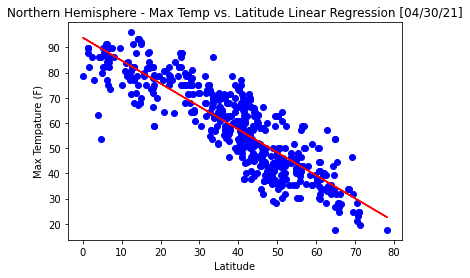

In [51]:
# create scatter plot and linear regression for Northern Hem max temp vs. latitude
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Image Output/north_hem_lat_vs_max_temp.jpg')

plt.show()

Analysis: As one moves further north away from the equator, the max tempature goes down.

In [33]:
# Starter Code Example

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40273320408275504


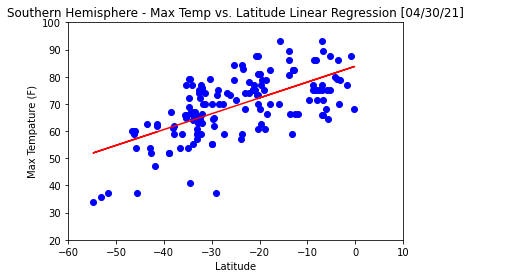

In [50]:
# create scatter plot and linear regression for Southern Hem max temp vs. latitude
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")
plt.xlim([-60, 10])
plt.ylim([20,100])
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Image Output/south_hem_lat_vs_max_temp.jpg')

plt.show()

Analysis: In the southern hemisphere, the further away from the equator the lower the max tempature. As latitudes get closer to thee equator, the max tempature increases.

In [35]:
# Starter code example

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00635588590388578


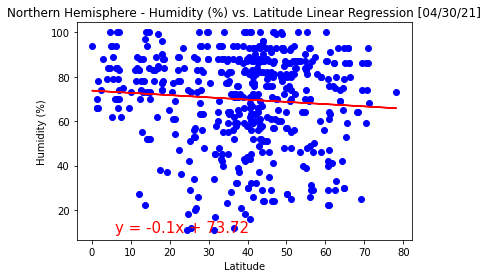

In [49]:
# create scatter plot and linear regression for Northern Hem Humidity vs. latitude
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Image Output/north_hem_lat_vs_humidity.jpg')

plt.show()

Analysis: There is not a strong correlation between Humidity and Latitude in the northern hempisphere.

In [37]:
# Starter code example

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08190784313204073


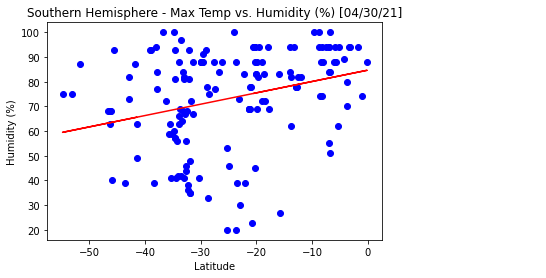

In [52]:
# create scatter plot and linear regression for Southern Hem Humidity vs. latitude
x_values_s_l = south_hem_df['Latitude']
y_values_s_h = south_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_s_l, y_values_s_h)
regress_values = x_values_s_l * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_s_l, y_values_s_h, marker="o", facecolors="blue")
plt.plot(x_values_s_l,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Humidity (%) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.xlim([-60, 10])
# plt.ylim([20,100])
plt.savefig('../Image Output/south_hem_lat_vs_humidity.jpg')
print(f"The r-squared is: {rvalue**2}")

plt.show()


Analysis: Based on the r-squared value, there is not a strong significant correlation found. There is a slightly positive linear regression but not statistically significant.

In [39]:
# starter code example

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009954508627987383


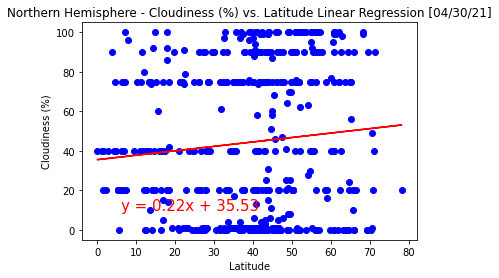

In [53]:
# create scatter plot and linear regression for Northern Hem Cloudiness vs. latitude 
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../Image Output/north_hem_lat_vs_cloud.jpg')

plt.show()

Analysis: Based on the r-squared value, there is not a statistically siginificant correlation found.

In [41]:
# Starter code example

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000308612524698474


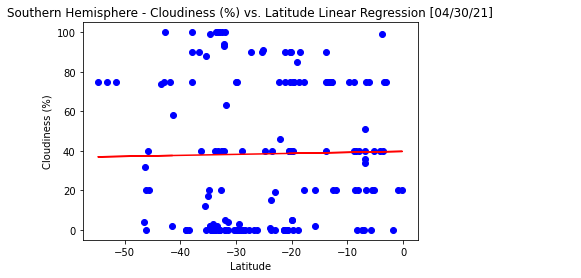

In [54]:
# create scatter plot and linear regression for Southern Hem Cloudiness vs. latitude 
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../Image Output/south_hem_lat_vs_cloud.jpg')

plt.show()

Analysis: Based on the r-squared value, there is not a statistically siginificant correlation found.

In [43]:
# Starter code example

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001969060339929597


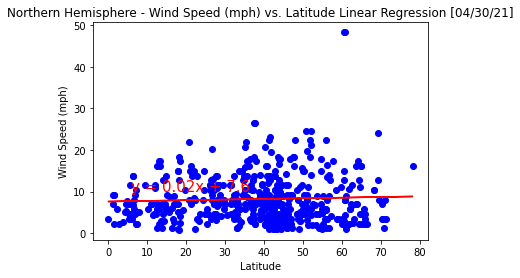

In [55]:
# create scatter plot and linear regression for Northern Hem Wind Speed vs. latitude 
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Image Output/north_hem_lat_vs_wind.jpg')

plt.show()

Analysis: Based on the r-squared value, there is not a statistically siginificant correlation found.

In [45]:
# starter code example

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003029165626101421


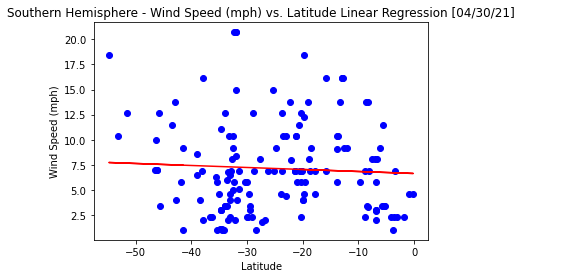

In [56]:
# create scatter plot and linear regression for Southern Hem Wind Speed vs. latitude 
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Image Output/south_hem_lat_vs_wind.jpg')

plt.show()

Analysis:  Based on the r-squared value, there is not a statistically siginificant correlation found.

In [47]:
# starter code example